In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [17]:
dataset=pd.read_csv("Mall_Customers.csv")

In [18]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
dataset.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [21]:
dataset.shape

(200, 5)

In [22]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
x=dataset.iloc[:,[3,4]].values
x.shape

(200, 2)

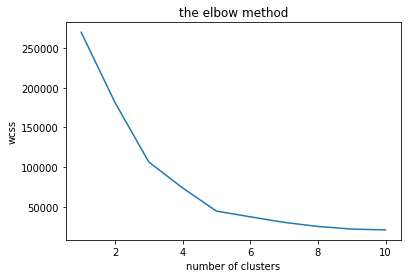

In [31]:
#using the elbow method to find the optimal no of clusters
import sklearn
from sklearn.cluster import KMeans
# within cluster sum of square(wcss)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
#     print(kmeans)
    kmeans.fit(x)
#     print(kmeans)
    wcss.append(kmeans.inertia_)
# print("WCSS",wcss)
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()
    

In [32]:
#applying k-means to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
# print(kmeans)
y_means=kmeans.fit_predict(x)
y_means.shape

(200,)

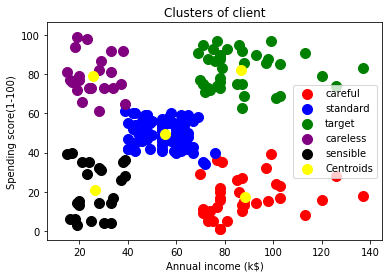

In [33]:
#visualization clusters
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='careful')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='standard')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='target')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='purple',label='careless')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='black',label='sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()